In [12]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import eternabench as eb
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this notebook:

Figure 3B -- Ranking based on ArchiveII Test set

Figure 3C -- Ranking based on EternaBench-CM Test set

also: Sequence data at 60% sequence similarity cutoff

Figure 3D -- Ranking based on EternaBench-Riboswitch Test set

Figure ED9 -- Ranking based on STRAND test set

# Secondary structure data -- ArchiveII_NR set

In [15]:
import os
import pandas as pd
import eternabench as eb  # Assuming this is how you import eternabench

# Load data
df = pd.read_csv(os.environ['ETERNABENCH_PATH'] + '/scoring_data/ArchiveII_output_with_Ribonanza_processed_F1s.csv')

# Extract package names
pkgs = [x.split(' ')[0] for x in df.keys() if x.endswith('F-score')]

# Initialize variables
id_vars = ['Category', 'Name']
reshaped_df = pd.DataFrame()

# Reshape DataFrame
for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    keys = [x for x in df.keys() if x.endswith(metric)]
    tmp = df[id_vars + keys]
    tmp2 = tmp.melt(id_vars=id_vars)
    tmp2['package'] = [x.split(' ')[0] for x in tmp2['variable']]
    tmp2[metric] = tmp2['value']
    tmp2 = tmp2.drop(columns=['variable', 'value'])
    
    if i == 0:
        reshaped_df = tmp2
    else:
        reshaped_df = pd.concat([reshaped_df, tmp2[[metric]]], axis=1)

# Add bootstrap indices
reshaped_df['bs_ind'] = list(range(len(df))) * 9

# Define dataset labels and package order
dataset_labels = ['16S (n=15)', '5S (n=90)', 'RNaseP (n=26)',
                  'grp1 (n=68)', 'grp2 (n=11)', 'srp(n=187)', 'tRNA (n=49)',
                  'Telomerase (n=18)', 'tmRNA (n=190)']

pkg_order = ['contrafold_2', 'eternafold_C', 'eternafold_D', 'eternafold_B', 
             'vienna_2', 'eternafold_A', 'eternafold_E', 'eternafold_G', 'eternafold_F']

# Generate heatmaps and save output
for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    print(metric)
    zscores, rank = eb.stats.calculate_Z_scores(reshaped_df, dataset_field='Category', metric=metric)
    
    eb.plot.ranked_heatmap(zscores, dataset_field='Category', metric=metric+'_zscore_by_Category_mean',
                           package_order=pkg_order, dataset_labels=dataset_labels, size=2)
    
    # Save figure
    plt.savefig(f'FIGURES/3/ArchiveII_NR_heatmap_{metric}.pdf', bbox_inches='tight')

# Save z-scores to CSV
zscores.to_csv('SUPP_TABLE_PRECURSORS/ArchiveII_NR_Fscore_by_dataset_20May2022.csv', index=False)



ValueError: Length of values (5805) does not match length of index (6450)

keys=['contrafold_2 F-score', 'vienna_2 F-score', 'eternafold_A F-score', 'eternafold_B F-score', 'eternafold_C F-score', 'eternafold_D F-score', 'eternafold_E F-score', 'eternafold_F F-score', 'eternafold_G F-score', 'RibonanzaNet F-score']
F-score
(4.699999999999999, 2.0) [2.6999999999999997, 2]


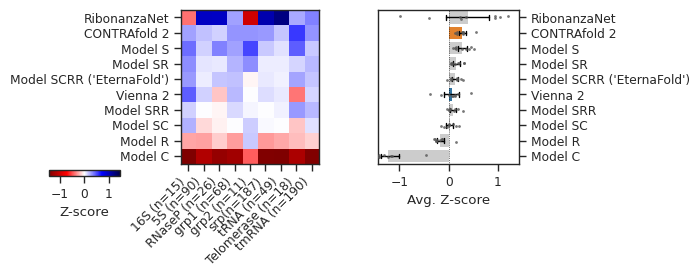

In [22]:
import os
import pandas as pd
import eternabench as eb  # Assuming this is how you import eternabench
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(os.environ['ETERNABENCH_PATH'] + '/scoring_data/ArchiveII_output_with_Ribonanza_processed_F1s.csv')

# Initialize variables
id_vars = ['Category', 'Name']
metric = 'F-score'

# Reshape DataFrame for F-score only
keys = [x for x in df.keys() if x.endswith(metric)]
print(f'keys={keys}')
tmp = df[id_vars + keys]
reshaped_df = tmp.melt(id_vars=id_vars)
reshaped_df['package'] = [x.split(' ')[0] for x in reshaped_df['variable']]
reshaped_df[metric] = reshaped_df['value']
reshaped_df = reshaped_df.drop(columns=['variable', 'value'])

# Add bootstrap indices
reshaped_df['bs_ind'] = list(range(len(df))) * len(keys)

# Define dataset labels and package order
dataset_labels = ['16S (n=15)', '5S (n=90)', 'RNaseP (n=26)',
                  'grp1 (n=68)', 'grp2 (n=11)', 'srp(n=187)', 'tRNA (n=49)',
                  'Telomerase (n=18)', 'tmRNA (n=190)']

pkg_order = ['RibonanzaNet', 'contrafold_2', 'eternafold_C', 'eternafold_D', 'eternafold_B', 
             'vienna_2', 'eternafold_A', 'eternafold_E', 'eternafold_G', 'eternafold_F']

# Generate heatmap and save output for F-score
print(metric)
zscores, rank = eb.stats.calculate_Z_scores(reshaped_df, dataset_field='Category', metric=metric)

eb.plot.ranked_heatmap(zscores, dataset_field='Category', metric=metric+'_zscore_by_Category_mean',
                       package_order=pkg_order, dataset_labels=dataset_labels, size=2)

# Save figure
plt.savefig(f'FIGURES/3/ArchiveII_NR_heatmap_{metric}.pdf', bbox_inches='tight')

# Save z-scores to CSV
zscores.to_csv('SUPP_TABLE_PRECURSORS/ArchiveII_NR_Fscore_by_dataset_w_RibonanzaNet.csv', index=False)





keys =['contrafold_2 F-score', 'vienna_2 F-score', 'eternafold_A F-score', 'eternafold_B F-score', 'eternafold_C F-score', 'eternafold_D F-score', 'eternafold_E F-score', 'eternafold_F F-score', 'eternafold_G F-score', 'RNET F-score']
['contrafold_2' 'vienna_2' 'eternafold_A' 'eternafold_B' 'eternafold_C'
 'eternafold_D' 'eternafold_E' 'eternafold_F' 'eternafold_G' 'RNET']
['contrafold_2', 'eternafold_C', 'eternafold_D', 'eternafold_B', 'vienna_2', 'eternafold_A', 'eternafold_E', 'eternafold_G', 'eternafold_F', 'RNET']
F-score
  package Category  F-score_mean  F-score_std  F-score_percentile_2.5  \
0    RNET      16s      0.715848     0.131607                0.432814   
1    RNET       5s      0.751419     0.112246                0.460989   
2    RNET   RNaseP      0.774584     0.077831                0.593489   
3    RNET     grp1      0.737137     0.104371                0.474555   
4    RNET     grp2      0.675301     0.037664                0.609010   

   F-score_percentile_97.5  

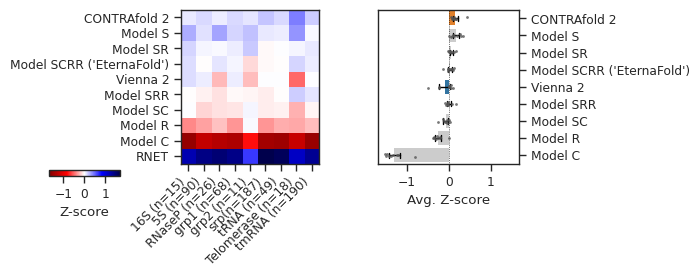

In [9]:
import os
import pandas as pd
import eternabench as eb  # Assuming this is how you import eternabench
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(os.environ['ETERNABENCH_PATH'] + '/scoring_data/ArchiveII_output_w_RNET.csv')

# Initialize variables
id_vars = ['Category', 'Name']
metric = 'F-score'

# Reshape DataFrame for F-score only
keys = [x for x in df.keys() if x.endswith(metric)]
print(f'keys ={keys}')
tmp = df[id_vars + keys]
reshaped_df = tmp.melt(id_vars=id_vars)
reshaped_df['package'] = [x.split(' ')[0] for x in reshaped_df['variable']]
reshaped_df[metric] = reshaped_df['value']
reshaped_df = reshaped_df.drop(columns=['variable', 'value'])

# Add bootstrap indices
reshaped_df['bs_ind'] = list(range(len(df))) * len(keys)

# Define dataset labels and package order
dataset_labels = ['16S (n=15)', '5S (n=90)', 'RNaseP (n=26)',
                  'grp1 (n=68)', 'grp2 (n=11)', 'srp(n=187)', 'tRNA (n=49)',
                  'Telomerase (n=18)', 'tmRNA (n=190)']

pkg_order = ['contrafold_2', 'eternafold_C', 'eternafold_D', 'eternafold_B', 
             'vienna_2', 'eternafold_A', 'eternafold_E', 'eternafold_G', 'eternafold_F', 'RNET']

# Print unique package names to verify RNET is included
print(reshaped_df['package'].unique())
print(pkg_order)

# Generate heatmap and save output for F-score
print(metric)
zscores, rank = eb.stats.calculate_Z_scores(reshaped_df, dataset_field='Category', metric=metric)

# Print z-scores to check if RNET is included
print(zscores.head())

eb.plot.ranked_heatmap(zscores, dataset_field='Category', metric=metric+'_zscore_by_Category_mean',
                       package_order=pkg_order, dataset_labels=dataset_labels, size=2)

# Save figure
plt.savefig(f'FIGURES/3/ArchiveII_NR_heatmap_{metric}.pdf', bbox_inches='tight')

# Save z-scores to CSV
zscores.to_csv('SUPP_TABLE_PRECURSORS/ArchiveII_NR_Fscore_by_dataset_w_RNET.csv', index=False)


# Secondary structure data -- STRAND Test set

(3.8, 1.6999999999999997) [1.7999999999999998, 2]
(3.8, 1.6999999999999997) [1.7999999999999998, 2]
(3.8, 1.6999999999999997) [1.7999999999999998, 2]


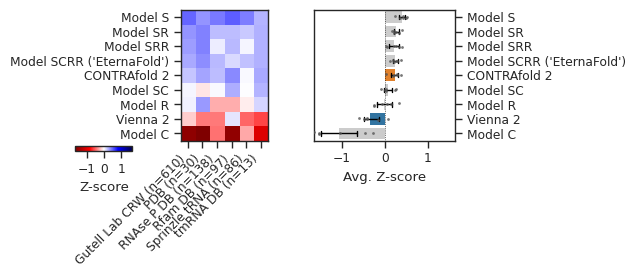

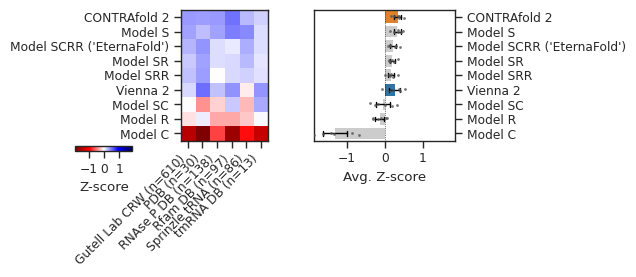

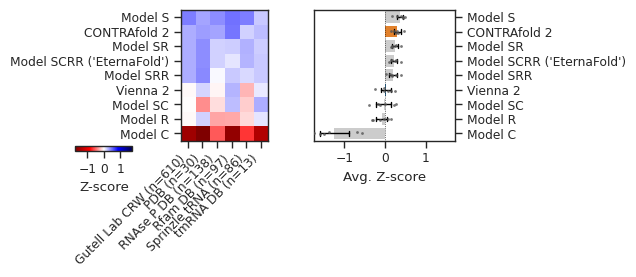

In [29]:
df = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/S-Processed-TES_metadata_plus_scores.csv')

pkgs = [x.split(' ')[0] for x in df.keys() if x.endswith('F-score')]

id_vars = ['SSTRAND_ID', 'TYPE', 'EXT_SOURCE', 'EXT_ID', 'ORGANISM']
reshaped_df = pd.DataFrame()

for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    keys = list([x for x in df.keys() if x.endswith(metric)])
    tmp = df[id_vars+keys]
    tmp2 = tmp.melt(id_vars=id_vars)
    tmp2['package'] = [x.split(' ')[0] for x in tmp2['variable']]
    tmp2[metric] = tmp2['value']
    tmp2 = tmp2.drop(columns=['variable','value'])
    if i==0:
        reshaped_df = tmp2
    else:
        reshaped_df = pd.concat([reshaped_df,tmp2[[metric]]],axis=1)

reshaped_df['bs_ind'] = [x for x in range(974)]*9

dataset_labels=['Gutell Lab CRW (n=610)', 'PDB (n=30)', 'RNAse P DB (n=138)', 'Rfam DB (n=97)', 'Sprinzle tRNA (n=86)', 'tmRNA DB (n=13)']

for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    zscores, _ = eb.stats.calculate_Z_scores(reshaped_df,dataset_field='EXT_SOURCE', metric=metric)
    
    eb.plot.ranked_heatmap(zscores, dataset_field='EXT_SOURCE',metric=metric+'_zscore_by_EXT_SOURCE_mean',dataset_labels=dataset_labels,size=2)
    plt.savefig('FIGURES/SI/STRAND_TES_heamap_%s_20May2022.pdf' % metric,bbox_inches='tight')

zscores.to_csv('../scoring_data/STRAND_Fscore_by_dataset.csv',index=False)

# Chemical Mapping data

(7.3999999999999995, 3.2) [5.3999999999999995, 2]


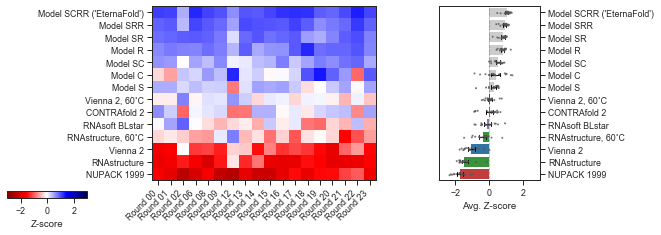

In [41]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EB_efold_test_set_80_pearson_zscores_by_Dataset.csv')
eb.plot.ranked_heatmap(zscores, vmin=-3,vmax=3,size=2)

savefig('FIGURES/3/Figure_3_cm_80cutoff.pdf',bbox_inches='tight')

(7.1, 3.2) [5.1, 2]


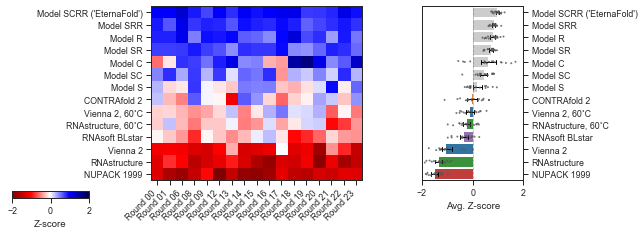

In [36]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EB_efold_test_set_60_pearson_zscores_by_Dataset.csv')
eb.plot.ranked_heatmap(zscores, vmin=-2,vmax=2,size=2)

savefig('FIGURES/3/Figure_3_cm_60cutoff.pdf',bbox_inches='tight')

# Riboswitch data

(4.699999999999999, 3.2) [2.6999999999999997, 2]


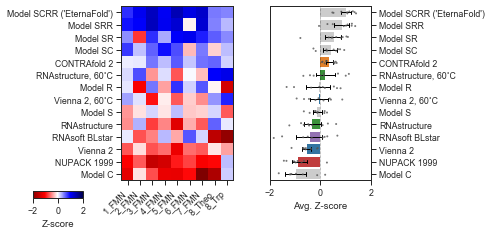

In [3]:
#zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_pearson_zscores_Fig3_efold_testset.csv')
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_pearson_zscores_Fig3_efold_testset_23May2022.csv')

eb.plot.ranked_heatmap(zscores, vmin=-2, vmax=2,size=2)
savefig('FIGURES/3/Figure_3D_20May2022.pdf',bbox_inches='tight')